In [1]:
%matplotlib inline

:::{admonition} Download
:class: important render-all

This notebook can be downloaded as **{nb-download}`fundamentals_of_pynapple-users.ipynb`**. See the button at the top right to download as markdown or pdf.
:::


# Learning the fundamentals of pynapple
This notebook has had all its explanatory text removed and has not been run.
 It is intended to be downloaded and run locally (or on the provided binder)
 while listening to the presenter's explanation. In order to see the fully
 rendered of this notebook, go [here](../../full/day1/fundamentals_of_pynapple.md)

## Learning objectives


- Instantiate the pynapple objects
- Make the pynapple objects interact
- Use numpy with pynapple
- Slicing pynapple objects
- Adding metadata to pynapple objects
- Learn the core functions of pynapple

The pynapple documentation can be found [here](https://pynapple.org).

The documentation for objects and method of the core of pynapple is [here](https://pynapple.org/api.html).


Let's start by importing the pynapple package and matplotlib to see if everything is correctly installed.
If an import fails, you can do `!pip install pynapple matplotlib` in a cell to fix it.

In [141]:
import pynapple as nap
import matplotlib.pyplot as plt
import numpy as np
import workshop_utils

In [142]:
var1 = np.random.randn(100) # Variable 1
tsp1 = np.arange(100) # The timesteps of variable 1

var2 = np.random.randn(100, 3) # Variable 2
tsp2 = np.arange(0, 100, 1) # The timesteps of variable 2
col2 = ['pineapple', 'banana', 'tomato'] # The name of each columns of var2

var3 = np.random.randn(1000, 4, 5) # Variable 3
tsp3 = np.arange(0, 100, 0.1) # The timesteps of variable 3

random_times_1 = np.array([3.14, 37.0, 42.0])
random_times_2 = np.array([10, 25, 50, 70])
random_times_3 = np.sort(np.random.uniform(10, 80, 100))

starts_1 = np.array([10000, 60000, 90000]) # starts of an epoch in `ms`
ends_1 = np.array([20000, 80000, 95000]) # ends in `ms`

## Instantiate pynapple objects 


**Question:** Can you instantiate the right pynapple objects for `var1`, `var2` and `var3`? Objects should be named respectively `tsd1`, `tsd2` and `tsd3`. Don't forget the column name for `var2`.

In [143]:
# enter code here
tsd1 = nap.Tsd(t=tsp1, d=var1)
tsd2 = nap.TsdFrame(t=tsp2, d=var2, columns=col2)
tsd3 = nap.TsdTensor(t=tsp3, d=var3)

**Question:** Can you print `tsd1`?

In [144]:
tsd1

Time (s)
----------  ----------
0.0          0.275093
1.0          1.30653
2.0         -0.983989
3.0          0.0753501
4.0          2.4675
5.0         -0.830946
6.0         -0.363743
...
93.0         1.49214
94.0         0.12468
95.0        -1.44793
96.0        -0.695265
97.0        -1.30764
98.0         0.994659
99.0         1.9119
dtype: float64, shape: (100,)

**Question:** Can you print `tsd2`?

In [145]:
tsd2

Time (s)    pineapple    banana    tomato
----------  -----------  --------  --------
0.0         0.46104      -1.27263  -0.95473
1.0         0.06074      -0.26644  1.33014
2.0         -1.14363     -0.66458  0.48703
3.0         -1.9073      0.61592   0.35012
4.0         0.39992      1.05771   -1.07964
5.0         0.58122      -0.51725  0.3182
6.0         0.59462      -0.80521  1.31528
...         ...          ...       ...
93.0        -0.61733     -0.93069  -0.79424
94.0        -0.1283      -0.63549  1.01334
95.0        -1.97964     0.95089   -0.47257
96.0        0.87341      -0.9485   1.76025
97.0        -1.94188     0.6937    -0.61822
98.0        0.4549       -2.58104  0.43296
99.0        -1.60526     -0.65391  -0.14758
dtype: float64, shape: (100, 3)

**Question:** Can you print `tsd3`?

In [146]:
tsd3

Time (s)
----------  -------------------------------
0.0         [[0.242297 ... 1.257742] ...]
0.1         [[-0.198991 ...  0.55856 ] ...]
0.2         [[0.593318 ... 0.743173] ...]
0.3         [[ 0.886922 ... -0.705494] ...]
0.4         [[-1.10168  ... -0.209402] ...]
0.5         [[-1.688731 ...  0.162456] ...]
0.6         [[ 0.027717 ... -0.019335] ...]
...
99.3        [[-0.274319 ... -0.329643] ...]
99.4        [[1.635817 ... 0.01693 ] ...]
99.5        [[ 0.205889 ... -1.240806] ...]
99.6        [[ 0.013774 ... -0.446888] ...]
99.7        [[ 1.825831 ... -0.591683] ...]
99.8        [[0.567869 ... 1.652038] ...]
99.9        [[-0.81142  ... -0.691759] ...]
dtype: float64, shape: (1000, 4, 5)

**Question:** Can you create an `IntervalSet` called `ep` out of `starts_1` and `ends_1` and print it? Be careful, times given above are in `ms`.

In [147]:
ep = nap.IntervalSet(start=starts_1, end=ends_1, time_units='ms')
ep

  index    start    end
      0       10     20
      1       60     80
      2       90     95
shape: (3, 2), time unit: sec.

The experiment generated a set of timestamps from 3 different channels.

**Question:** Can you instantiate the corresponding pynapple object (`ts1`, `ts2`, `ts3`) for each one of them?

In [148]:
ts1 = nap.Ts(random_times_1)
ts2 = nap.Ts(random_times_2)
ts3 = nap.Ts(random_times_3)

This is a lot of timestamps to carry around as well.

**Question:** Can you instantiate the right pynapple object (call it `tsgroup`) to group them together?

In [149]:
tsgroup = nap.TsGroup(
    data={
        0: ts1,
        1: ts2,
        2: ts3
    },
)

**Question:** ... and print it?

In [150]:
tsgroup

  Index     rate
-------  -------
      0  0.03906
      1  0.05209
      2  1.30216

## Interaction between pynapple objects 


**Question:** Can you print the `time_support` of `tsgroup`?

In [151]:
# It looks like time_support is initialized (since it wasn't passed) to
# start at the first timestamp and end on the last timestamp
tsgroup.time_support

  index    start      end
      0     3.14  79.9354
shape: (1, 2), time unit: sec.

**Question:** can you recreate the `tsgroup` object passing the right `time_support` during initialisation?

In [152]:
tsgroup = nap.TsGroup(
    data={
        0: ts1,
        1: ts2,
        2: ts3,
    },
    time_support=nap.IntervalSet(0, 100),
)

**Question:** Can you print the `time_support` and `rate` to see how they changed?

In [153]:
print(tsgroup.time_support)
print('--')
print(tsgroup.rate)

  index    start    end
      0        0    100
shape: (1, 2), time unit: sec.
--
0    0.03
1    0.04
2    1.00
Name: rate, dtype: float64


Now you realized the variable `tsd1` has some noise. The good signal is between 10 and 30 seconds and  50 and 100.

**Question:** Can you create an `IntervalSet` object called `ep_signal` and use it to restrict the variable `tsd1`?

## 

In [154]:
ep_signal = nap.IntervalSet(start=[10, 50], end=[30, 100])
print(tsd1.restrict(ep_signal))
print('--')
print(tsd1.time_support)

Time (s)
----------  ---------
10.0        -0.804048
11.0         1.36627
12.0         0.823075
13.0        -1.19363
14.0         0.229354
15.0        -1.06192
16.0        -0.559755
...
93.0         1.49214
94.0         0.12468
95.0        -1.44793
96.0        -0.695265
97.0        -1.30764
98.0         0.994659
99.0         1.9119
dtype: float64, shape: (71,)
--
  index    start    end
      0        0     99
shape: (1, 2), time unit: sec.


You can print `tsd1` to check that the timestamps are in fact within `ep`.
You can also check the `time_support` of `tsd1` to see that it has been updated.

**Question:** Can you do the intersection of `ep_signal` and `ep_tmp`?

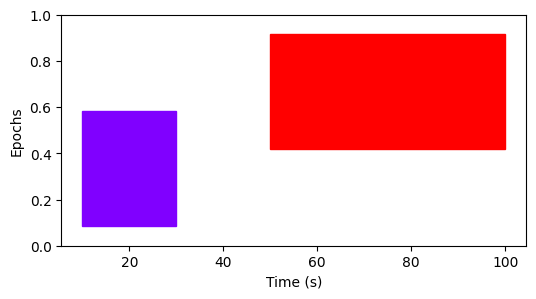

In [155]:
ep_tmp = nap.IntervalSet(start=40, end=60)
workshop_utils.visualize_intervals(ep_signal)

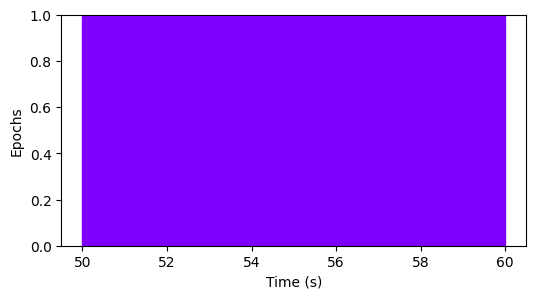

In [156]:
workshop_utils.visualize_intervals(ep_signal.intersect(ep_tmp))

You can visualize IntervalSet using the function `workshop_utils.visualize_intervals` we provide.

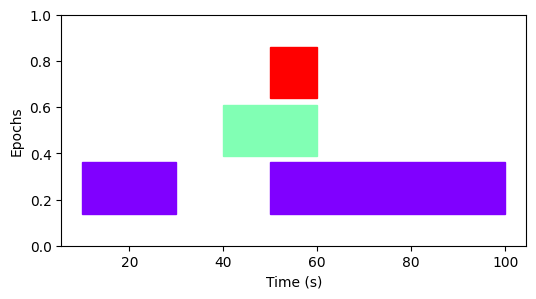

In [157]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.intersect(ep_tmp)])

**Question:** Can you do the union of `ep_signal` and `ep_tmp`?

In [158]:
ep_union = ep_signal.union(ep_tmp)
ep_union

  index    start    end
      0       10     30
      1       40    100
shape: (2, 2), time unit: sec.

**Question:** ... and visualize it?

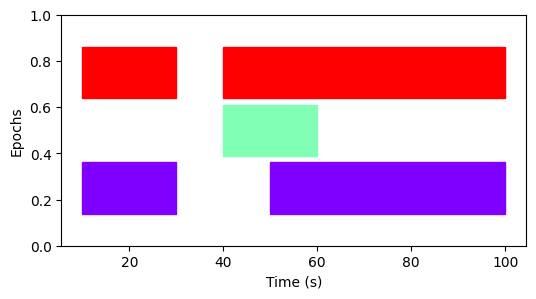

In [159]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_union])

**Question:** Can you do the difference of `ep_signal` and `ep_tmp`?

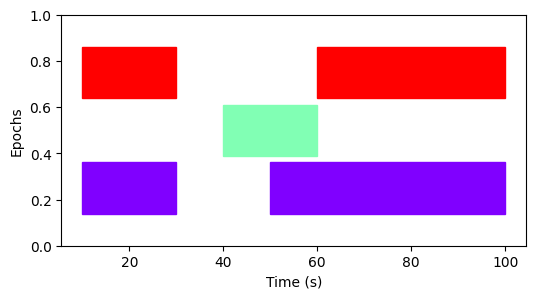

In [160]:
ep_diff = ep_signal.set_diff(ep_tmp)
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_diff])

**Question:** ... and visualize it?

In [161]:
?workshop_utils.visualize_intervals

Signature: workshop_utils.visualize_intervals(eps)
Docstring: <no docstring>
File:      ~/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/src/workshop_utils/plotting.py
Type:      function

## Numpy & pynapple


Pynapple objects behaves very similarly like numpy array. They can be sliced with the following syntax :

  `tsd[0:10] # First 10 elements`

Arithmetical operations are available as well :

  `tsd = tsd + 1`

Finally numpy functions works directly. Let's imagine `tsd3` is a movie with frame size (4,5).

**Question:** Can you compute the average frame along the time axis using `np.mean` and print the result?

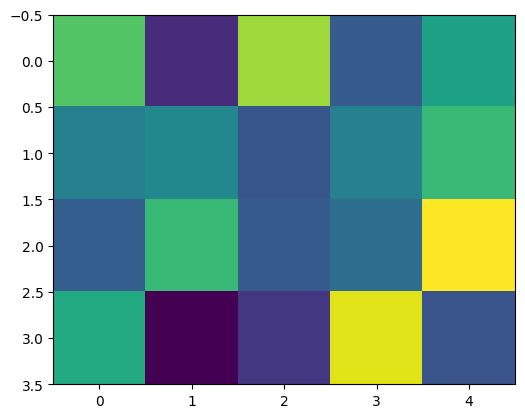

In [162]:
# tsd.size # gives us 1000,4,5 -- first one is the time axis
mean_frame = np.mean(tsd3, axis=0)
plt.imshow(mean_frame)

**Question:**: can you compute the average of `tsd2` for each timestamps and print it?

In [163]:
tsd2

Time (s)    pineapple    banana    tomato
----------  -----------  --------  --------
0.0         0.46104      -1.27263  -0.95473
1.0         0.06074      -0.26644  1.33014
2.0         -1.14363     -0.66458  0.48703
3.0         -1.9073      0.61592   0.35012
4.0         0.39992      1.05771   -1.07964
5.0         0.58122      -0.51725  0.3182
6.0         0.59462      -0.80521  1.31528
...         ...          ...       ...
93.0        -0.61733     -0.93069  -0.79424
94.0        -0.1283      -0.63549  1.01334
95.0        -1.97964     0.95089   -0.47257
96.0        0.87341      -0.9485   1.76025
97.0        -1.94188     0.6937    -0.61822
98.0        0.4549       -2.58104  0.43296
99.0        -1.60526     -0.65391  -0.14758
dtype: float64, shape: (100, 3)

In [164]:
tsd2.mean(axis=1)

Time (s)
----------  ----------
0.0         -0.588773
1.0          0.374816
2.0         -0.440391
3.0         -0.313752
4.0          0.126
5.0          0.127392
6.0          0.368229
...
93.0        -0.780754
94.0         0.0831852
95.0        -0.500441
96.0         0.561722
97.0        -0.622135
98.0        -0.564392
99.0        -0.802252
dtype: float64, shape: (100,)

## Slicing pynapple objects 


**Question:** Can you extract the first and last epoch of `ep` in a new `IntervalSet`?

In [165]:
# enter code here
ep_new = ep[[0,2],:]
##
print(ep)
print('--')
print(ep_new)

  index    start    end
      0       10     20
      1       60     80
      2       90     95
shape: (3, 2), time unit: sec.
--
  index    start    end
      0       10     20
      1       90     95
shape: (2, 2), time unit: sec.


Sometimes you want to get a data point as close as possible in time to another timestamps.

**Question:** Using the `get` method, can you get the data point from `tsd3` as close as possible to the time 50.1 seconds?

In [166]:
?tsd3.get

Signature: tsd3.get(start, end=None, time_units='s')
Docstring:
Slice the time series from `start` to `end` such that all the timestamps satisfy `start<=t<=end`.
If `end` is None, only the timepoint closest to `start` is returned.

By default, the time support doesn't change. If you want to change the time support, use the `restrict` function.

Parameters
----------
start : float or int
    The start (or closest time point if `end` is None)
end : float or int or None
    The end
File:      ~/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/.venv/lib/python3.11/site-packages/pynapple/core/base_class.py
Type:      method

In [167]:
tsd3.get(50.1)

array([[-1.67048985,  1.18923934, -0.60666043, -0.08409059, -0.15144817],
       [ 1.10957747, -1.49191126, -0.20017315, -1.66754692,  1.33223634],
       [-0.87102822,  0.47497842, -1.42080668, -0.0578017 , -1.14157555],
       [-0.75678519, -0.05736657,  0.27791938, -0.16867259,  0.50018441]])

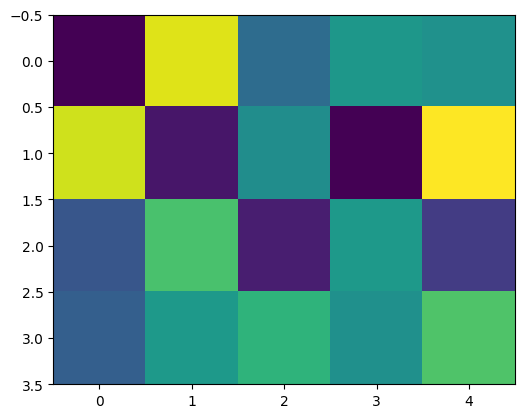

In [168]:
plt.imshow(tsd3.get(50.1))

## Metadata


Metadata are ubiquitous in neuroscience. They can be added to 3 pynapple objects :

- `TsGroup` : to label neurons in electrophysiology
- `IntervalSet` : to label intervals
- `TsdFrame` : to label neurons in calcium imaging


**Question:** Can you run the following command `tsgroup['planet'] = ['mars', 'venus', 'saturn']`

In [169]:
tsgroup

  Index    rate
-------  ------
      0    0.03
      1    0.04
      2    1

In [170]:
tsgroup['planet'] = ['mars', 'venus', 'saturn']

**Question:** ... and print it?

In [171]:
tsgroup

  Index    rate  planet
-------  ------  --------
      0    0.03  mars
      1    0.04  venus
      2    1     saturn

The object `ep` has 3 epochs labelled `['left', 'right', 'left']`. 

**Question:** Can you add them as a metadata column called `direction`?

In [172]:
ep.direction = ['left', 'right', 'left']

In [173]:
ep

  index    start    end  direction
      0       10     20  left
      1       60     80  right
      2       90     95  left
shape: (3, 2), time unit: sec.

In [174]:
tsgroup.

SyntaxError: invalid syntax (749335751.py, line 1)

The object `tsd2` has 3 columns. Each column correspond to the rgb colors `[(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]`. 

**Question:** Can you add them as metadata of `tsd2`?

In [175]:
tsd2.set_info(rgb=[(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)])
tsd2.set_info(rgb2=[(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]) # Both of these get added

You can also add metadata at initialization as a dictionnary using the keyword argument `metadata` :

In [176]:
tsd2

Time (s)    pineapple    banana         tomato
----------  -----------  -------------  ---------------
0.0         0.46104      -1.27263       -0.95473
1.0         0.06074      -0.26644       1.33014
2.0         -1.14363     -0.66458       0.48703
3.0         -1.9073      0.61592        0.35012
4.0         0.39992      1.05771        -1.07964
5.0         0.58122      -0.51725       0.3182
6.0         0.59462      -0.80521       1.31528
...         ...          ...            ...
93.0        -0.61733     -0.93069       -0.79424
94.0        -0.1283      -0.63549       1.01334
95.0        -1.97964     0.95089        -0.47257
96.0        0.87341      -0.9485        1.76025
97.0        -1.94188     0.6937         -0.61822
98.0        0.4549       -2.58104       0.43296
99.0        -1.60526     -0.65391       -0.14758
Metadata
--------    --------     --------       --------
rgb         (0, 0, 1)    (0.5, 0.5, 1)  (0.1, 0.2, 0.3)
rgb2        (0, 0, 1)    (0.5, 0.5, 1)  (0.1, 0.2, 0.3)

dtype

In [177]:
tsgroup = nap.TsGroup({0:ts1, 1:ts2, 2:ts3}, metadata={'planet':['mars','venus', 'saturn']})

print(tsgroup)

  Index     rate  planet
-------  -------  --------
      0  0.03906  mars
      1  0.05209  venus
      2  1.30216  saturn


Metadata are accessible either as attributes (i.e. `tsgroup.planet`) or as dictionnary-like keys (i.e. `ep['direction']`).

They can be used to slice objects. 

**Question:** Can you select only the elements of `tsgroup` with rate below 1Hz?

In [178]:
tsgroup

  Index     rate  planet
-------  -------  --------
      0  0.03906  mars
      1  0.05209  venus
      2  1.30216  saturn

In [179]:
tsgroup[tsgroup.rate < 1]

  Index     rate  planet
-------  -------  --------
      0  0.03906  mars
      1  0.05209  venus

**Question:** Can you select the intervals in `ep` labelled as `'left'`?

In [180]:
ep

  index    start    end  direction
      0       10     20  left
      1       60     80  right
      2       90     95  left
shape: (3, 2), time unit: sec.

In [181]:
ep[ep.direction == 'left']

  index    start    end  direction
      0       10     20  left
      1       90     95  left
shape: (2, 2), time unit: sec.

### Special case of slicing : `TsdFrame`

In [182]:
tsdframe = nap.TsdFrame(
    t=np.arange(4), d=np.random.randn(4,3),
    columns = [12, 0, 1], metadata={'alpha':[2,1,0]}
)

print(tsdframe)

Time (s)    12        0         1
----------  --------  --------  --------
0.0         2.51205   -1.73259  0.20099
1.0         -1.12707  -0.46151  0.95461
2.0         0.95779   0.67416   -0.59126
3.0         -2.26937  0.30712   0.37986
Metadata
--------    --------  --------  --------
alpha       2         1         0

dtype: float64, shape: (4, 3)


**Question:** What happen when you do `tsdframe[0]` vs `tsdframe[:,0]` vs `tsdframe[[12,1]]`

In [183]:
print(tsdframe[0])

[ 2.51205019 -1.73258861  0.20098754]


In [184]:
tsdframe[:,0]

Time (s)
----------  ---------
0            2.51205
1           -1.12707
2            0.957786
3           -2.26937
dtype: float64, shape: (4,)

In [185]:
tsdframe[[12, 1]]

IndexError: index 12 is out of bounds for axis 0 with size 4

In [186]:
tsdframe

Time (s)    12        0         1
----------  --------  --------  --------
0.0         2.51205   -1.73259  0.20099
1.0         -1.12707  -0.46151  0.95461
2.0         0.95779   0.67416   -0.59126
3.0         -2.26937  0.30712   0.37986
Metadata
--------    --------  --------  --------
alpha       2         1         0

dtype: float64, shape: (4, 3)

**Question:** What happen when you do `tsdframe.loc[0]` and `tsdframe.loc[[0,1]]`

In [187]:
print(tsdframe.loc[0])
print('--')
print(tsdframe.loc[[0,1]])

Time (s)
----------  ---------
0           -1.73259
1           -0.461511
2            0.674156
3            0.307119
dtype: float64, shape: (4,)
--
Time (s)    0         1
----------  --------  --------
0.0         -1.73259  0.20099
1.0         -0.46151  0.95461
2.0         0.67416   -0.59126
3.0         0.30712   0.37986
Metadata
--------    --------  --------
alpha       1         0

dtype: float64, shape: (4, 2)


**Question:** What happen when you do `tsdframe[tsdframe.alpha==2]`

In [188]:
tsdframe[tsdframe.alpha == 2]

Time (s)    12
----------  --------
0.0         2.51205
1.0         -1.12707
2.0         0.95779
3.0         -2.26937
Metadata
--------    --------
alpha       2

dtype: float64, shape: (4, 1)

## Core functions of pynapple 


This part focuses on the most important core functions of pynapple.

**Question:** Using the `count` function, can you count the number of events within 1 second bins for `tsgroup` over the `ep_signal` intervals?

In [189]:
tsgroup

  Index     rate  planet
-------  -------  --------
      0  0.03906  mars
      1  0.05209  venus
      2  1.30216  saturn

In [190]:
ep_signal

  index    start    end
      0       10     30
      1       50    100
shape: (2, 2), time unit: sec.

In [191]:
tsgroup.count(ep=ep_signal)

Time (s)      0    1    2
----------  ---  ---  ---
20            0    2   29
75            0    2   43
dtype: float64, shape: (2, 3)

From a set of timestamps, you want to assign them a set of values with the closest point in time of another time series.

**Question:** Using the function `value_from`, can you assign values to `ts2` from the `tsd1` time series and call the output `new_tsd`?

In [192]:
new_tsd = ts2.value_from(tsd1)

**Question:** Can you plot together `tsd1`, `ts2` and `new_tsd`?

In [193]:
tsd1

Time (s)
----------  ----------
0.0          0.275093
1.0          1.30653
2.0         -0.983989
3.0          0.0753501
4.0          2.4675
5.0         -0.830946
6.0         -0.363743
...
93.0         1.49214
94.0         0.12468
95.0        -1.44793
96.0        -0.695265
97.0        -1.30764
98.0         0.994659
99.0         1.9119
dtype: float64, shape: (100,)

In [194]:
ts2

Time (s)
10.0
25.0
50.0
70.0
shape: 4

In [195]:
new_tsd

Time (s)
----------  ---------
10          -0.804048
25           0.760319
50          -0.361153
70          -1.52693
dtype: float64, shape: (4,)

## 

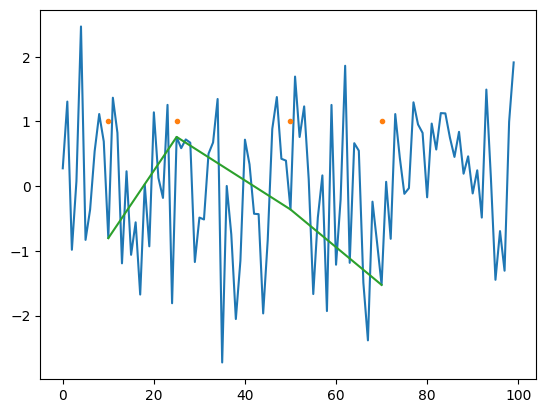

In [196]:
fig, ax = plt.subplots(1,1)
ax.plot(tsd1.t, tsd1)
ax.plot(ts2.t, np.ones(len(ts2.t)), '.')
ax.plot(new_tsd.t, new_tsd)

One important aspect of data analysis is to bring data to the same size. Pynapple provides the `bin_average` function to downsample data.

**Question:** Can you downsample `tsd2` to one time point every 5 seconds?

In [197]:
tsd2

Time (s)    pineapple    banana         tomato
----------  -----------  -------------  ---------------
0.0         0.46104      -1.27263       -0.95473
1.0         0.06074      -0.26644       1.33014
2.0         -1.14363     -0.66458       0.48703
3.0         -1.9073      0.61592        0.35012
4.0         0.39992      1.05771        -1.07964
5.0         0.58122      -0.51725       0.3182
6.0         0.59462      -0.80521       1.31528
...         ...          ...            ...
93.0        -0.61733     -0.93069       -0.79424
94.0        -0.1283      -0.63549       1.01334
95.0        -1.97964     0.95089        -0.47257
96.0        0.87341      -0.9485        1.76025
97.0        -1.94188     0.6937         -0.61822
98.0        0.4549       -2.58104       0.43296
99.0        -1.60526     -0.65391       -0.14758
Metadata
--------    --------     --------       --------
rgb         (0, 0, 1)    (0.5, 0.5, 1)  (0.1, 0.2, 0.3)
rgb2        (0, 0, 1)    (0.5, 0.5, 1)  (0.1, 0.2, 0.3)

dtype

In [199]:
tsd2_new = tsd2.bin_average(5)

**Question:** Can you plot the `tomato` column from `tsd2` as well as the downsampled version?

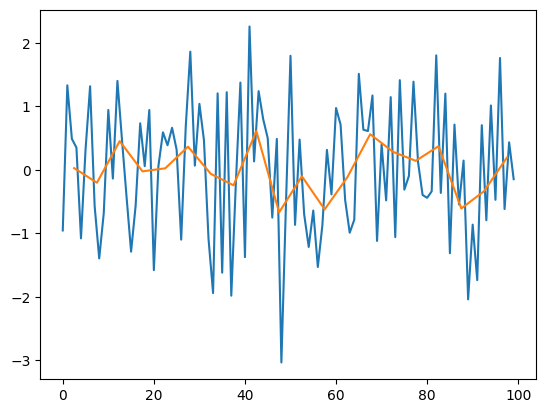

In [205]:
fig, ax = plt.subplots(1,1)
ax.plot(tsd2.t, tsd2['tomato'])
ax.plot(tsd2_new.t, tsd2_new['tomato'])

For `tsd1`, you want to find all the epochs for which the value is above 0.0. Pynapple provides the function `threshold` to get 1 dimensional time series above or below a certain value.

**Question**: Can you print the epochs for which `tsd1` is above 0.0?

In [206]:
tsd1

Time (s)
----------  ----------
0.0          0.275093
1.0          1.30653
2.0         -0.983989
3.0          0.0753501
4.0          2.4675
5.0         -0.830946
6.0         -0.363743
...
93.0         1.49214
94.0         0.12468
95.0        -1.44793
96.0        -0.695265
97.0        -1.30764
98.0         0.994659
99.0         1.9119
dtype: float64, shape: (100,)

In [207]:
?tsd1.threshold

Signature: tsd1.threshold(thr, method='above')
Docstring:
Apply a threshold function to the tsd to return a new tsd
with the time support being the epochs above/below/>=/<= the threshold

Parameters
----------
thr : float
    The threshold value
method : str, optional
    The threshold method ("above"[default], "below", "aboveequal", "belowequal")

Returns
-------
out: Tsd
    All the time points below/ above/greater than equal to/less than equal to the threshold

Raises
------
ValueError
    Raise an error if method is unknown.
RuntimeError
    Raise an error if thr is too high/low and no epochs is found.

Examples
--------
This example finds all epoch above 0.5 within the tsd object.

>>> import pynapple as nap
>>> tsd = nap.Tsd(t=np.arange(100), d=np.random.rand(100))
>>> newtsd = tsd.threshold(0.5)

The epochs with the times above/below the threshold can be accessed through the time support:

>>> tsd = nap.Tsd(t=np.arange(100), d=np.arange(100), time_units='s')
>>> tsd.threshold(50

In [208]:
tsd1.threshold(0.0)

Time (s)
----------  ---------
0.0         0.275093
1.0         1.30653
3.0         0.0753501
4.0         2.4675
7.0         0.539309
8.0         1.11414
9.0         0.69057
...
88.0        0.191895
89.0        0.460556
91.0        0.24408
93.0        1.49214
94.0        0.12468
98.0        0.994659
99.0        1.9119
dtype: float64, shape: (57,)

**Question**: can you plot `tsd1` as well as the epochs for which `tsd1` is above 0.0?

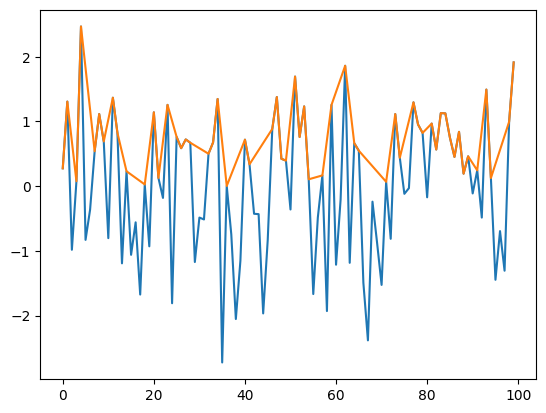

In [209]:
tsd1_threshed = tsd1.threshold(0)

fig, ax = plt.subplots(1,1)
ax.plot(tsd1.t, tsd1)
ax.plot(tsd1_threshed.t, tsd1_threshed)

## Important


**Question:** Does this work?
If not, please ask a TA.

In [210]:
import workshop_utils
path = workshop_utils.fetch_data("Mouse32-140822.nwb")
print(path)

/Users/jorge/Princeton Dropbox/Jorge Yanar/research/workshops/ccn-software-jan-2025/data/Mouse32-140822.nwb
